<a href="https://colab.research.google.com/github/script000kiddies000/data-sience-with-python/blob/main/Data_Science_in_Telco_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Data Science in Telco: Data Cleansing</h1>

<div id="theory"><h2>Tugas dan Langkah</h2><p>Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum di lakukan permodelan.</p>
<p>Pada tugas kali ini, kamu akan melakukan Data Prepocessing (Data Cleansing) bulan lalu, yakni Juni 2020.</p>
<p>Langkah yang akan dilakukan adalah,</p>
<ol>
<li>Mencari ID pelanggan (Nomor telphone) yang valid</li>
<li>Mengatasi data-data yang masih kosong (Missing Values)</li>
<li>Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable</li>
<li>Menstandarisasi Nilai dari Variable</li>
</ol></div>

<div id="theory"><h2>Library yang Digunakan</h2><p>Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,</p>
<ol>
<li>
<p>Pandas</p>
<p>Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.</p>
<ul>
<li><code>read_csv()</code>&nbsp;digunakan untuk membaca file csv</li>
<li><code>str.match()</code>&nbsp;digunakan untuk mencocokan dengan karakter tertentu</li>
<li><code>drop()</code>&nbsp;digunakan untuk menghapus</li>
<li><code>count()</code>&nbsp;digunakan untuk mengitung masing-masing variable</li>
<li><code>drop_duplicates()</code>&nbsp;digunakan untuk menghapus data duplicate rows</li>
<li><code>fillna()</code>&nbsp;digunakan untuk mengisi dengan nilai tertentu</li>
<li><code>quantile()</code>&nbsp;digunakan untuk melihat quantile ke tertentu</li>
<li><code>mask()</code>&nbsp;menganti nilai tertentu jika kondisi memenuhi</li>
<li><code>astype()</code>&nbsp;merunubah tipe data</li>
<li><code>value_counts()</code>&nbsp;digunakan untuk mengitung unik dari kolom</li>
<li><code>sort_values()</code>&nbsp;digunakan untuk sort values</li>
<li><code>isnull()</code>&nbsp;digunakan untuk mendeteksi missing values</li>
<li><code>dropna()</code>&nbsp;digunakan untuk menghapus missing values</li>
<li><code>replace()</code>&nbsp;digunakan untuk mengganti nilai</li>
</ul>
</li>
<li>
<p>Matplotlib</p>
<p>Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.</p>
<ul>
<li><code>figure()</code>&nbsp;digunakan untuk membuat figure gambar baru</li>
</ul>
</li>
<li>
<p>Seaborn</p>
<p>Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.</p>
<ul>
<li><code>box_plot()</code>&nbsp;digunakan untuk membuat box plot</li>
</ul>
</li>
</ol></div>

<div id="theory"><h2>Data yang DIgunakan</h2><div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Untuk Dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python&nbsp;<code>df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')</code></p>
</div>
</div>
</div>
<div class="cell text_cell unselected rendered" tabindex="2">
<div class="prompt input_prompt">&nbsp;</div>
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Untuk detil datanya adalah sebagai berikut:</p>
<ul>
<li><code>UpdatedAt</code>&nbsp;Periode of Data taken</li>
<li><code>customerID</code>&nbsp;Customer ID</li>
<li><code>gender</code>&nbsp;Whether the customer is a male or a female&nbsp;<span style="color: red;">(Male, Female)</span></li>
<li><code>SeniorCitizen</code>&nbsp;Whether the customer is a senior citizen or not&nbsp;<span style="color: red;">(1, 0)</span></li>
<li><code>Partner</code>&nbsp;Whether the customer has a partner or not&nbsp;<span style="color: red;">(Yes, No)</span></li>
<li><code>Dependents</code>&nbsp;Whether the customer has dependents or not&nbsp;<span style="color: red;">(Yes, No)</span></li>
<li><code>tenure</code>&nbsp;Number of months the customer has stayed with the company</li>
<li><code>PhoneService</code>&nbsp;Whether the customer has a phone service or not&nbsp;<span style="color: red;">(Yes, No)</span></li>
<li><code>MultipleLines</code>&nbsp;Whether the customer has multiple lines or not&nbsp;<span style="color: red;">(Yes, No, No phone service)</span></li>
<li><code>InternetService</code>&nbsp;Customer’s internet service provider&nbsp;<span style="color: red;">(DSL, Fiber optic, No)</span></li>
<li><code>OnlineSecurity</code>&nbsp;Whether the customer has online security or not&nbsp;<span style="color: red;">(Yes, No, No internet service)</span></li>
<li><code>OnlineBackup</code>&nbsp;Whether the customer has online backup or not&nbsp;<span style="color: red;">(Yes, No, No internet service)</span></li>
<li><code>DeviceProtection</code>&nbsp;Whether the customer has device protection or not&nbsp;<span style="color: red;">(Yes, No, No internet service)</span></li>
<li><code>TechSupport</code>&nbsp;Whether the customer has tech support or not&nbsp;<span style="color: red;">(Yes, No, No internet service)</span></li>
<li><code>StreamingTV</code>&nbsp;Whether the customer has streaming TV or not&nbsp;<span style="color: red;">(Yes, No, No internet service)</span></li>
<li><code>StreamingMovies</code>&nbsp;Whether the customer has streaming movies or not&nbsp;<span style="color: red;">(Yes, No, No internet service)</span></li>
<li><code>Contract</code>&nbsp;The contract term of the customer&nbsp;<span style="color: red;">(Month-to-month, One year, Two year)</span></li>
<li><code>PaperlessBilling</code>&nbsp;Whether the customer has paperless billing or not&nbsp;<span style="color: red;">(Yes, No)</span></li>
<li><code>PaymentMethod</code>&nbsp;The customer’s payment method&nbsp;<span style="color: red;">(Electronic check, Mailed check, Bank transfer&nbsp;(automatic), Credit card&nbsp;(automatic))</span></li>
<li><code>MonthlyCharges</code>&nbsp;The amount charged to the customer monthly</li>
<li><code>TotalCharges</code>&nbsp;The total amount charged to the customer</li>
<li><code>Churn</code>&nbsp;Whether the customer churned or not&nbsp;<span style="color: red;">(Yes or No)</span></li>
</ul>
</div>
</div>
</div></div>

<div id="theorycontent"><h2>Import Library dan Dataset</h2><p>Berdasarkan penjelasan mengenai library dan dataset yang akan digunakan, sekarang hal pertama yang akan kita lakukan adalah melakukan import library dan dataset ke dalam workspace kita.</p>
<p>Setelah dataset di-import ke dalam workspace, tampilkan jumlah kolom dan baris dari data set dengan menggunakan .shape dan print 5 baris teratas dengan menggunakan head() dan carilah ada berapa nilai customerID yang bersifat unique dengan menggunakan .unique</p>
<pre>import pandas as pd<br>pd.options.display.max_columns = 50<br><br>df_load = pd.read_csv('https://raw.githubusercontent.com/script000kiddies000/data-sience-with-python/main/data/dqlab_telco.csv')</pre>
<p>Notes :</p>
<p>1. pd.options.display.max_columns = 50 digunakan untuk mempermudah penampilan row data</p>
<p>2. Simpan dataset ke dalam variabel df_load</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p></div>

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
# Importing Data Source
df_load = pd.read_csv('https://raw.githubusercontent.com/script000kiddies000/data-sience-with-python/main/data/dqlab_telco.csv')
print(df_load.shape)
print(df_load.head(5))
print(df_load.customerID.nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

<div id="theorycontent"><h2>Memfilter ID Number Pelanggan Format Tertentu</h2><div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Mencari format ID Number (Phone Number) Pelanggan&nbsp;<code>customerID</code>&nbsp;yang benar, dengan kriteria:</p>
<ul>
<li>Panjang karakter adalah 11-12.</li>
<li>Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka</li>
<li>Diawali dengan angka 45 2 digit pertama.</li>
</ul>
</div>
</div>
</div>
<div class="cell text_cell unselected rendered" tabindex="2">
<div class="prompt input_prompt">&nbsp;</div>
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Gunakan fungsi&nbsp;<code>count()</code>&nbsp;untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan&nbsp;<code>str.match()</code>&nbsp;&amp; regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan&nbsp;<code>astype()</code>&nbsp;untuk merubah tipe datanya yang semula numeric</p>
<p><strong>Notes : Buat kolom bantuan baru dengan nama `valid_id`</strong></p>
<p>Hasil yang diharapkan adalah sebagai berikut.</p>
<pre>Hasil jumlah ID Customer yang terfilter adalah 7006</pre>
</div>
</div>
</div></div>

In [2]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


<div id="theorycontent"><h2>Memfilter Duplikasi ID Number Pelanggan</h2><div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:</p>
<ul>
<li>Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya</li>
<li>Duplikasi dikarenakan inserting beda periode pengambilan data</li>
</ul>
</div>
</div>
</div>
Gunakan hasil dari pengolahan di tahap sebelumnya <code>df_load</code>&nbsp;untuk di olah di tahap ini. Gunakan fungsi&nbsp;<code>drop_duplicates()</code>&nbsp;untuk menghapus duplikasi rows, dan gunakan&nbsp;<code>sort_valus()</code>&nbsp;untuk mengecek pengambilan data terakhir
    
    Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993

In [3]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


<div id="theory"><h2>Kesimpulan</h2><p>Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersbut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 coloumns dengan 7017 jumlah ID yang Unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data</p></div>

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Mengatasi Missing Values dengan Penghapusan Rows</h2><div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Selanjutnya kita akan menghapus Rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Di asumsikan data modeller hanya mau menerima data yang benar ada flag churn nya atau tidak.</p>
</div>
</div>
</div>
<div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Gunakan&nbsp;<code>isnull()</code>&nbsp;digunakan untuk mendeteksi missing values dan&nbsp;<code>dropna()</code>&nbsp;untuk menghapus data yang missing values</p>
<br>Berikut adalah hasil yang diharapkan :<br><br>
<span role="presentation">Total missing values data dari kolom Churn 43<br>Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)</span>
</div>
</div>
</div>


In [4]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())

# Dropping all Rows with spesific column

df_load.dropna(subset=['Churn'],inplace=True)

print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


<div id="theorycontent"><h2>Mengatasi Missing Values dengan Pengisian Nilai tertentu</h2><p>Selain dengan mengapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:</p>
<ul>
<li><code>Tenure</code>&nbsp;pihak data modeller meminta setiap rows yang memiliki missing values untuk Lama berlangganan di isi dengan 11</li>
<li>Variable yang bersifat numeric selain&nbsp;<code>Tenure</code>&nbsp;di isi dengan median dari masing-masing variable tersebut</li>
</ul>
<p>Tentukan :</p>
<ul>
<li>Apakah masih ada data yang missing values</li>
<li>Jumlah Missing Values dari masing-masing variable</li>
<li>Tangani Missing Valuesnya</li>
</ul>
<p>Hasil yang diharapkan :</p>
<p>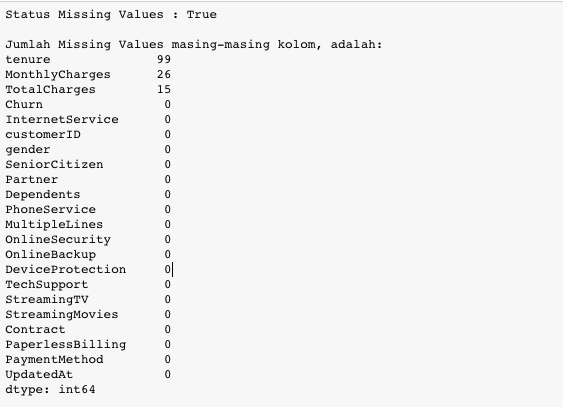</p>
<p>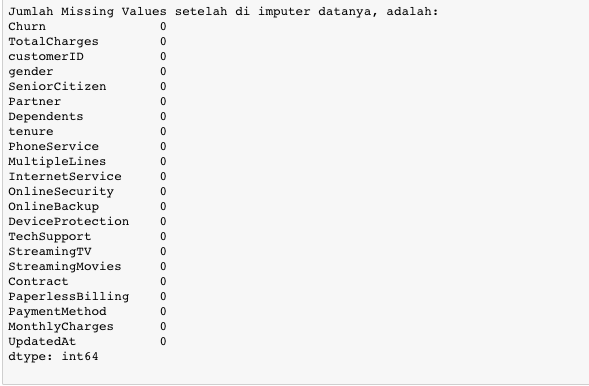</p></div>

In [5]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV

<div id="theory"><h2>Kesimpulan</h2><p>Setelah kita analisis lebih lanjut, ternyata masih ada Missing Values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom&nbsp;<code>Churn</code>,&nbsp;<code>tenure</code>,&nbsp;<code>MonthlyCharges</code>&nbsp;&amp;&nbsp;<code>TotalCharges</code>. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (Outlier)</p></div>

<div id="theorycontent"><h2>Mendeteksi adanya Outlier (Boxplot)</h2><div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.</p>
</div>
</div>
</div>
<div class="cell text_cell unselected rendered" tabindex="2">
<div class="prompt input_prompt">&nbsp;</div>
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Gunakan package&nbsp;<code>matplotlib</code>&nbsp;&amp;&nbsp;<code>seaborn</code>&nbsp;untuk memvisualisasika data-data yang mau dilihat box plot nya. Fungsi&nbsp;<code>describe()</code>&nbsp;gunakan saat untuk melihat deskripsi datanya</p>
<p>Berikut hasil yang diharapkan setelah program dijalankan.</p>
<p>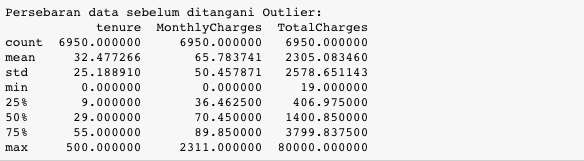</p>
<p>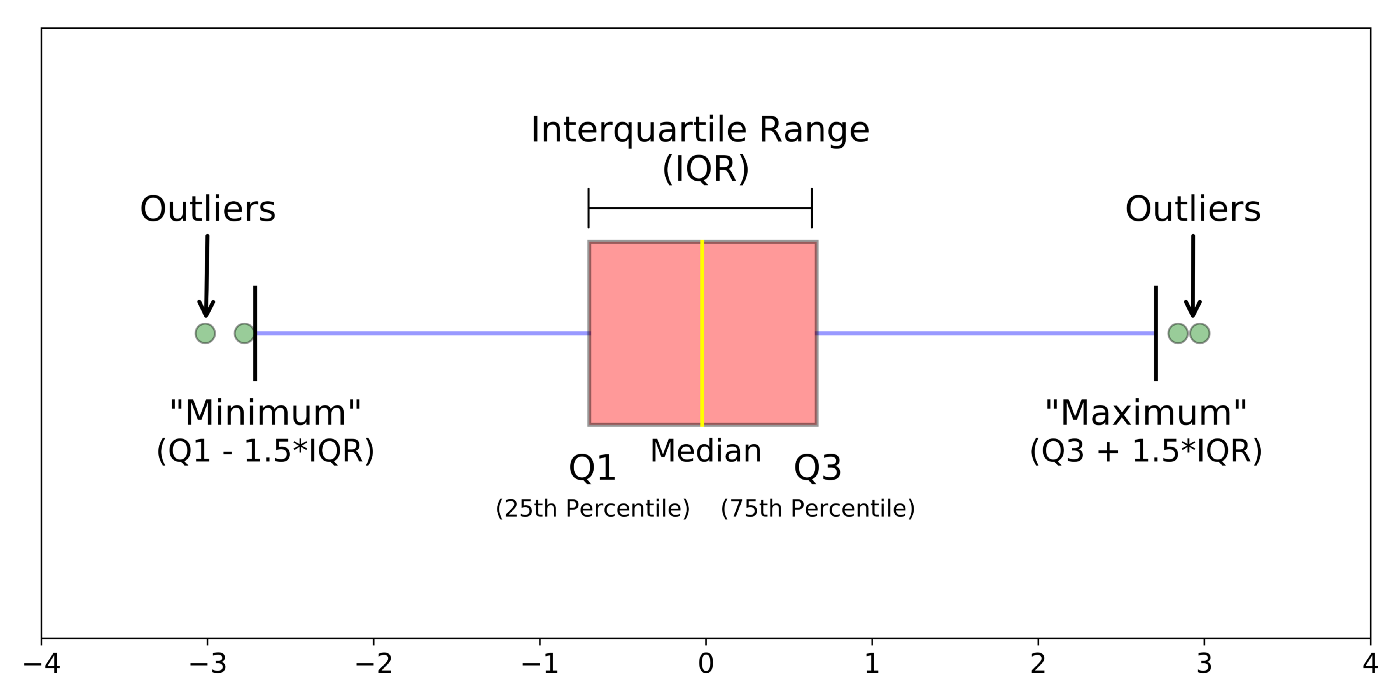</p>
</div>
</div>
</div></div>


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


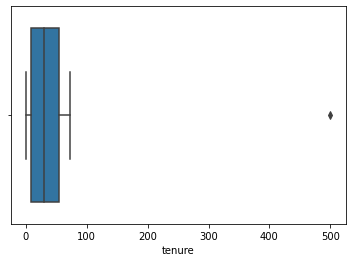

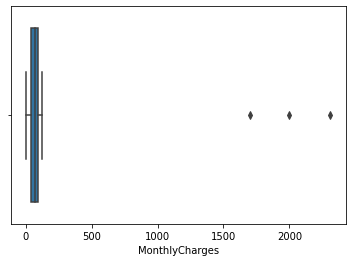

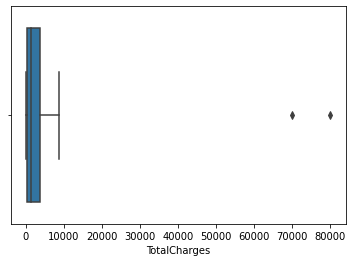

In [6]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

<div id="theorycontent"><h2>Mengatasi Outlier</h2>

<p>Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode&nbsp;<em>interquartile range</em> (IQR). Untuk detil jelasnya, bisa dilihat di ilustrasi di bawah ini:</p>
<p>&nbsp;</p>
</div>
</div>
</div>
<div>
<div>Gunakan hasil dari pengolahan di tahap sebelumnya <code>df_load</code>&nbsp;untuk di olah di tahap ini. Gunakan fungsi&nbsp;<code>quantile()</code>&nbsp;untuk melihat quantile tertentu, dan gunakan&nbsp;<code>mask()</code>&nbsp;untuk mereplace nilai. Tentukan:</div>

<ul>
<li>Nilai Minimum dan Maximum data di tolerir</li>
<li>Ubah Nilai yg di luar Range Minumum &amp; Maximum ke dalam nilai Minimum dan Maximum</li>
</ul>
<p>Hasil yang diharapkan adalah sebagai berikut.</p>
<p>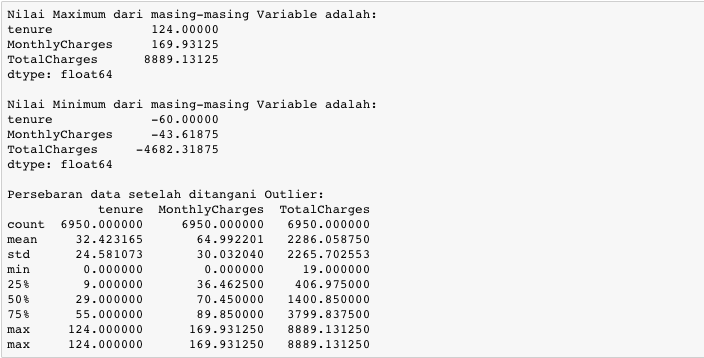</p>
</div>
</div>
</div></div>

In [7]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())				

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<div id="theory"><h2>Kesimpulan</h2><p>Dari ketiga boxplot dengan variable&nbsp;<em>'tenure','MonthlyCharges' &amp; 'TotalCharges'</em>&nbsp;terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya. Kemudian kalo kita liat persebaran datanya dari kolom&nbsp;<strong>max</strong>&nbsp;nya juga ada nilai yang sangat tinggi sekali.</p>
<p>Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum &amp; Minimum dari&nbsp;<em>interquartile range</em>&nbsp;(IQR). Setelah di tangani outliernya, dan dilihat perseberan data nya, terlihat sudah tidak ada lagi nilai yang outlier.</p></div>

<div id="theorycontent"><h2>Mendeteksi Nilai yang tidak Standar</h2><div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standarisasi dari data yang sudah terinput.</p>
</div>
</div>
</div>
<div class="cell text_cell unselected rendered" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<p>Gunakan fungsi&nbsp;<code>value_counts()</code>&nbsp;untuk melihat jumlah data unique per variable nya</p>
<p>Adapun potongan dari hasil yang diharapkan adalah sebagai berikut</p>
<p>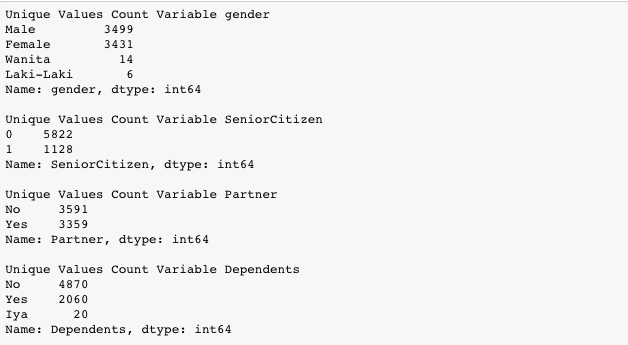</p>
<p>Notes : Pada gambar hanya ditampilkan sebagian output yang diharapkan</p>
<p>&nbsp;</p>
</div>
</div>
</div></div>

In [8]:
#Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
  print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
  print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

<div id="theorycontent"><h2>Menstandarisasi Variable Kategorik</h2><p>Setelah kita mengeteahui variable mana saja yang ada nilai tidak standar, maka kita standarkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh :&nbsp;<em>Iya</em>&nbsp;-&gt;&nbsp;<em>Yes</em>&nbsp;Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. Gunakan fungsi&nbsp;<code>replace()</code>&nbsp;untuk menstandarkan nilai</p>
<p>Berikut hasil yang diharapkan :</p>
<p>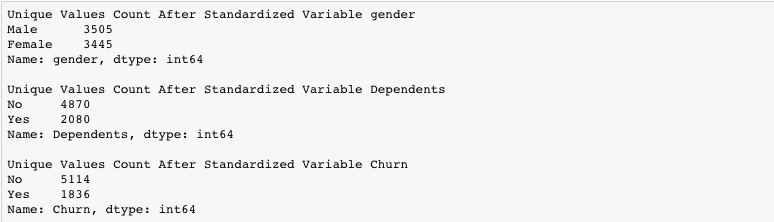</p>
<p>&nbsp;</p></div>

In [9]:


df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
  print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
  print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


<div id="theory"><h2>Kesimpulan</h2><p>Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah :</p>
<ul>
<li><code>Gender</code>&nbsp;(Female, Male, Wanita, Laki-Laki), yang bisa di standarkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.</li>
<li><code>Dependents</code>&nbsp;(Yes, No, Iya), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.</li>
<li><code>Churn</code>&nbsp;(Yes, No, Churn), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.</li>
</ul>
<p>Setelah kita standarkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value nya.</p></div>